<a href="https://colab.research.google.com/github/YanaSalova/PythonTasks/blob/main/ModelingMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Чтобы запустить код повторно, нужно запускать ячейки сверху вниз,  начиная с библиотек


In [ ]:
#Библиотеки
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import time

### Метод обратных функций:

In [ ]:
def inverseFunctionMethod():
    alpha = random.random() # генерируем случайное число alpha из диапазона [0, 1)
    a = math.exp(-1) # вычисляем константу a
    b = 3*a + 4 # вычисляем константу b
    c = 2/b
    k1 = c * a
    k2 = k1 + 2 * c
    # Проверяем, попадает ли alpha в первый интервал и используем соответствующую формулу для генерации значения
    if alpha < k1:
        return math.log(1/2 * b * alpha)
    # Если alpha находится между k1 и k2, то используем другую формулу для генерации значения
    elif alpha > k1 and alpha < k2: # иначе
        return -1 + np.sqrt(alpha * b - 2*a)
    # Если alpha больше k2, то используем третью формулу для генерации значения
    else:
      return np.sqrt(-np.log(b - alpha * b))

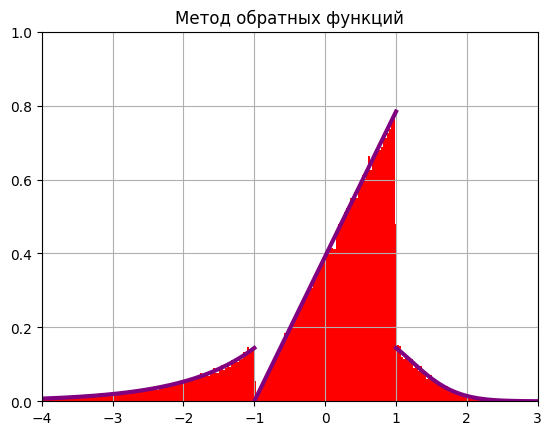

In [ ]:

fig, ax = plt.subplots(1, 1) # создаем область рисования
ax.grid() # добавляем сетку
ax.set_xlim([-4, 3]) # задаем границы по оси x
ax.set_ylim([0, 1]) # задаем границы по оси y

x1 = np.arange(-5, -1, 0.00001) # создаем массив значений x от -5 до 1 с шагом 0.00001
x2 = np.arange(-1, 1, 0.00001) # создаем массив значений x от 1 до 2 с шагом 0.00001
x3 = np.arange(1, 5, 0.00001) # создаем массив значений x от 2 до 3 с шагом 0.00001
c = 1 / (3/2*math.exp(-1) + 2) # вычисляем константу c

# строим график функции плотности вероятности распределения
ax.plot(x1, c * np.exp(x1), x2, c * (x2 + x2/x2) , x3, c * x3 * np.exp((-1) * x3 ** (2)) ,linewidth= 3, color="purple")

sizeOfSample = 100000 # задаем размер выборки

# Метод обратных функций
sampleIFM = [inverseFunctionMethod() for i in range(sizeOfSample)] # генерируем выборку с помощью метода обратных функций
ax.hist(sampleIFM, 500, density=True, color="red") # строим гистограмму выборки
plt.title("Метод обратных функций") # задаем заголовок для графика

plt.show() # выводим график на экран

### Метод дискретной декомпозиции

In [ ]:
# Определяем функцию для метода дискретной декомпозиции
def discreteDecompositionMethod():
    # Генерируем два случайных числа в диапазоне от 0 до 1
    a1, a2 = random.random(), random.random()
    # Вычисляем c
    c = 2 / (3 * math.exp(-1) + 4)

    # Если a1 умноженное на 2 и константа e в степени 1 меньше c, то используется первая формула для генерации значения
    if a1*2*math.exp(1)  < c:
        return math.sqrt(1 - math.log(1 - a2))
    # Если a1 умноженное на константу e в степени 1 и 2 меньше 3c, то используется вторая формула для генерации значения
    elif a1*np.exp(1)*2 < 3*c:
        return np.log(a2) - 1
    # В противном случае используется третья формула для генерации значения
    else:
      return  -1 + np.sqrt(4 * a2)

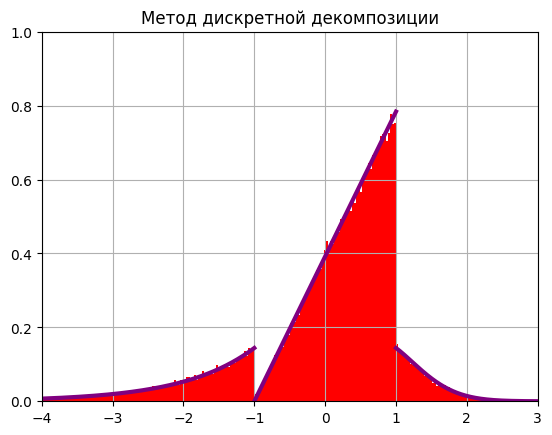

In [ ]:
fig, ax = plt.subplots(1, 1) # создаем область рисования
ax.grid() # добавляем сетку
ax.set_xlim([-4, 3]) # задаем границы по оси x
ax.set_ylim([0, 1]) # задаем границы по оси y

x1 = np.arange(-5, -1, 0.00001) # создаем массив значений x от -5 до 1 с шагом 0.00001
x2 = np.arange(-1, 1, 0.00001) # создаем массив значений x от 1 до 1 с шагом 0.00001
x3 = np.arange(1, 5, 0.00001) # создаем массив значений x от 1 до 5 с шагом 0.00001
c = 2 / (3*math.exp(-1) + 4) # вычисляем константу c

# строим график функции плотности вероятности распределения
ax.plot(x1, c * np.exp(x1), x2, c * (x2 + x2/x2) , x3, c * x3 * np.exp((-1) * x3 ** (2)) ,linewidth= 3, color="purple")

sizeOfSample = 100000 # задаем размер выборки

# Генерируем выборку методом дискретной декомпозиции
sampleDDM = [discreteDecompositionMethod() for i in range(sizeOfSample)]
# Строим гистограмму выборки
ax.hist(sampleDDM, 500, density=True, color="red")
# Добавляем название графика
plt.title("Метод дискретной декомпозиции")
plt.show() # выводим график на экран

### Метод отбора

In [ ]:
def rejectionMethod():

    while True:
      a1, a2 = random.random(), random.random()
      a = -np.log(-2*a1+2)
      b = np.log(2*a1)

      if  ((a2<=1/2*np.exp(-1) and a1<=1/2*np.exp(-1) and a1>0) or
              (1/2*np.exp(-1)<a1 and a1<1/2 and np.exp(-b)*(b+1)>= 2*np.exp(1)*a2)):
               return b
      elif ((1/2<a1 and a1<(np.exp(1)*2-1)/(2*np.exp(1)) and np.exp(a)*(a+1)>=2*np.exp(1)*a2) or
              ((2*np.exp(1)-1)/(2*np.exp(1))<a1 and a*np.exp((-1)*a**2)*np.exp(a)>= 2*np.exp(1)*a2)):
              return a


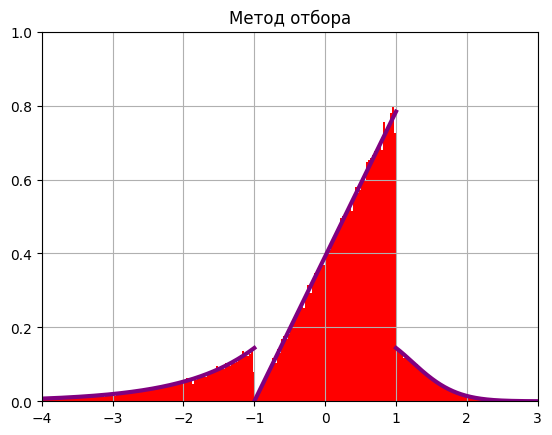

In [ ]:
fig, ax = plt.subplots(1, 1) # создаем область рисования
ax.grid() # добавляем сетку
ax.set_xlim([-4, 3]) # задаем границы по оси x
ax.set_ylim([0, 1]) # задаем границы по оси y

x1 = np.arange(-5, -1, 0.00001) # создаем массив значений x от -5 до 1 с шагом 0.00001
x2 = np.arange(-1, 1, 0.00001) # создаем массив значений x от 1 до 1 с шагом 0.00001
x3 = np.arange(1, 5, 0.00001) # создаем массив значений x от 1 до 5 с шагом 0.00001
c = 2 / (3*math.exp(-1) + 4) # вычисляем константу c

# строим график функции плотности вероятности распределения
ax.plot(x1, c * np.exp(x1), x2, c * (x2 + x2/x2) , x3, c * x3 * np.exp((-1) * x3 ** (2)) ,linewidth= 3, color="purple")

sizeOfSample = 100000 # задаем размер выборкии

# Генерируем выборку методом отбора
sampleRM = [ rejectionMethod() for i in range(sizeOfSample)]
# Строим гистограмму выборки
ax.hist(sampleRM, 500, density=True, color="red")
# Добавляем название графика
plt.title("Метод отбора")
plt.show() # выводим график на экран